In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import netCDF4
import xarray as xr
import pandas as pd
import seaborn as sns
import gsw
%matplotlib inline

In [2]:
from datetime import datetime
from mpl_toolkits.basemap import Basemap
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
data = xr.open_dataset('nodc_5904989_prof.nc')

In [4]:
levels = data.n_levels
psal = data.psal
temp = data.temp
# there are 259 profiles, over 750 levels
# averaged over all the profiles
data['temp_mean'] = data.temp.mean(dim='n_prof') 
data['pres_mean'] = data.pres.mean(dim='n_prof')                             
data['psal_mean'] = data.psal.mean(dim='n_prof') 
data = data.swap_dims({'n_prof': 'juld', 'n_levels': 'pres_mean'}).rename({'juld': 'time'})

# Temperature profiles

In [5]:
data.psal

<xarray.DataArray 'psal' (time: 259, pres_mean: 750)>
array([[ 34.978001,  34.979   ,  34.979   , ...,        nan,        nan,
               nan],
       [ 34.924999,  34.924999,  34.924   , ...,        nan,        nan,
               nan],
       [ 34.915001,  34.914001,  34.914001, ...,        nan,        nan,
               nan],
       ..., 
       [ 34.201   ,  34.201   ,  34.201   , ...,        nan,        nan,
               nan],
       [ 34.146999,  34.146999,  34.150002, ...,        nan,        nan,
               nan],
       [ 34.095001,  34.095001,  34.095001, ...,  34.920799,        nan,
               nan]])
Coordinates:
  * time       (time) datetime64[ns] 2014-06-13T05:00:30.988800 ...
  * pres_mean  (pres_mean) float64 3.737 5.036 6.976 8.979 10.98 12.98 14.98 ...
Attributes:
    long_name:       Practical salinity
    standard_name:   sea_water_salinity
    units:           psu
    valid_min:       2.0
    valid_max:       41.0
    C_format:        %9.3f
    FORTRAN

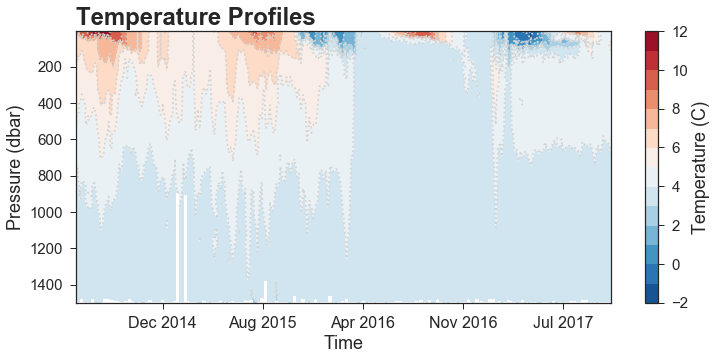

In [7]:
sns.set(font_scale = 1.5)
sns.set_style('ticks')
fig = plt.figure(figsize=(12,5))
ax = plt.gca()
g = data.temp.transpose().plot.contourf(vmin=-2, vmax=12,yincrease=False, cmap='RdBu_r',levels=15, add_colorbar=True)
contours = data.temp.transpose().plot.contour(vmin=-2, vmax=12,yincrease=False, cmap='lightgray',levels=15,linestyles='dotted')
g.colorbar.set_label('Temperature (C)', FontSize=18)
ax.set_ylabel('Pressure (dbar)', FontSize=18)
ax.set_xlabel('Time', FontSize = 18)
ax.set_title('Temperature Profiles',FontSize=24, loc='left',fontweight='bold')
plt.savefig('Tprof.png', bbox_inches='tight')
originalLabel = [float(str(i.get_text()))*1e18 for i in ax.get_xticklabels()[1:-1]]
dateticks = [datetime.fromtimestamp(originalLabel[d]/1e9) for d in range(0,len(originalLabel))]
newLabel = ['']
for i in range(0,len(dateticks)):
    dateticksFormat = datetime.strptime((str(dateticks[i])), '%Y-%m-%d %H:%M:%S')
    newLabel.append(datetime.strftime(dateticksFormat, '%b 20%y'))
ax.set_xticklabels(newLabel, size=16);

# Salinity profiles

In [37]:
data.psal.min()

<xarray.DataArray 'psal' ()>
array(32.97200012207031)

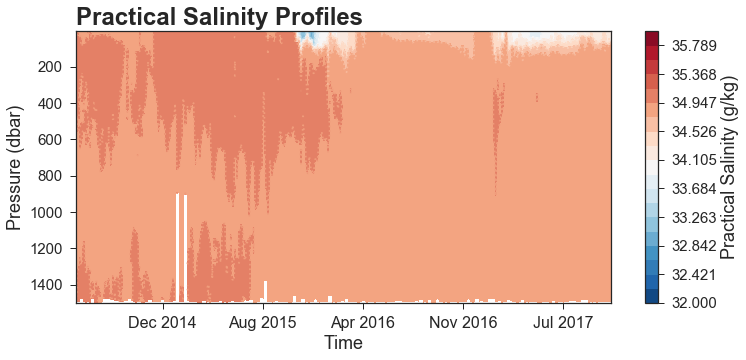

In [48]:
sns.set(font_scale = 1.5)
sns.set_style('ticks')
fig = plt.figure(figsize=(12,5))
ax = plt.gca()
s = data.psal.transpose().plot.contourf(vmin=32, vmax=36,yincrease=False, cmap='RdBu_r', levels=20, add_colorbar=True)
contours = data.psal.transpose().plot.contour(vmin=32, vmax=36,yincrease=False, cmap='RdBu_r',levels=20,linestyles='dotted')
s.colorbar.set_label('Practical Salinity (g/kg)', FontSize=18)
ax.set_ylabel('Pressure (dbar)', FontSize=18)
ax.set_xlabel('Time', FontSize = 18)
ax.set_title('Practical Salinity Profiles',FontSize=24, fontweight='bold', loc='left')
plt.savefig('Sprof.png', bbox_inches='tight')
originalLabel = [float(str(i.get_text()))*1e18 for i in ax.get_xticklabels()[1:-1]]
dateticks = [datetime.fromtimestamp(originalLabel[d]/1e9) for d in range(0,len(originalLabel))]
newLabel = ['']
for i in range(0,len(dateticks)):
    dateticksFormat = datetime.strptime((str(dateticks[i])), '%Y-%m-%d %H:%M:%S')
    newLabel.append(datetime.strftime(dateticksFormat, '%b 20%y'))
ax.set_xticklabels(newLabel, size=16);

# Temperature-Salinity Plots

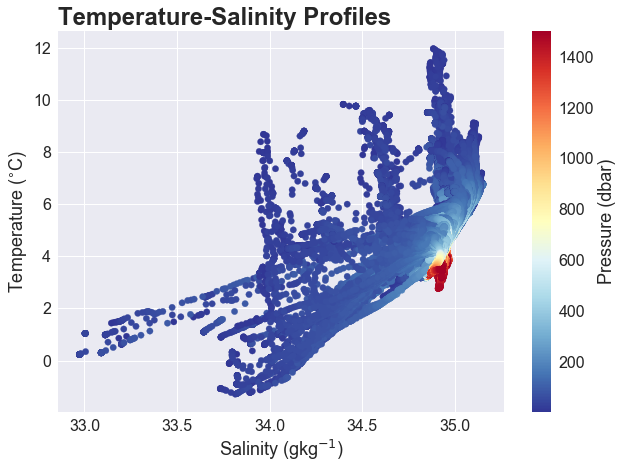

In [10]:
sns.set(font_scale=1.6)
fig = plt.figure(figsize=(10,7))
ax = plt.gca()
cax = ax.scatter(data.psal,data.temp, s=40, c=data.pres,cmap='RdYlBu_r')
ax.set_xlabel('Salinity (gkg$^{-1}$)',FontSize=18)
ax.set_ylabel('Temperature ($^{\circ}$C)',FontSize=18)
ax.set_title('Temperature-Salinity Profiles',FontSize=24, fontweight='bold', loc='left')
cbar = fig.colorbar(cax)
cbar.set_label('Pressure (dbar)',FontSize=18)
plt.savefig('TSprof.png', bbox_inches='tight')

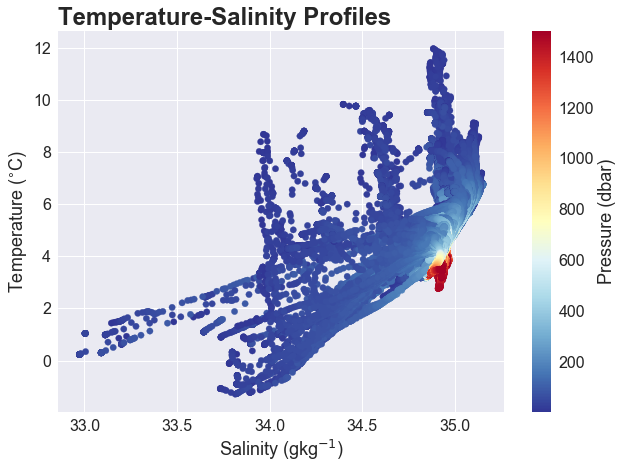

In [11]:
Image(filename='TSprof.png') 

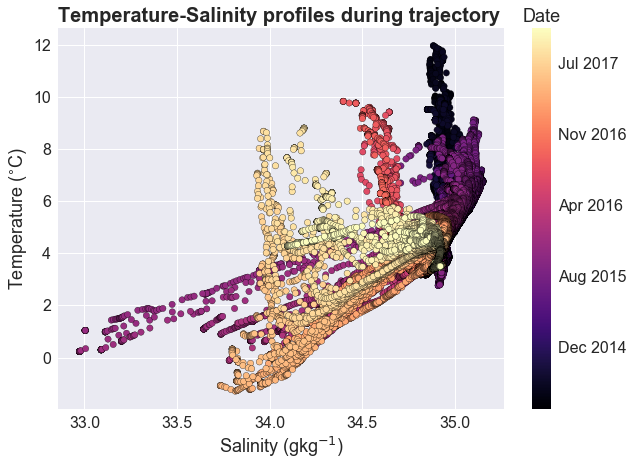

In [128]:
sns.set(font_scale=1.6)
fig = plt.figure(figsize=(10,7))
ax = plt.gca()
cax = ax.scatter(data.psal,data.temp, s=40, c=np.array([data.time.values,]*750).transpose(),cmap='magma',edgecolor='k')
ax.set_xlabel('Salinity (gkg$^{-1}$)',FontSize=18)
ax.set_ylabel('Temperature ($^{\circ}$C)',FontSize=18)
cbar = fig.colorbar(cax)
originalLabel = [(float(i.get_text())*1e18) for i in cbar.ax.get_yticklabels()]
dateticks = [datetime.fromtimestamp(originalLabel[d]/1e9) for d in range(0,len(originalLabel))]
newLabel = []
for i in range(0,len(dateticks)):
    dateticksFormat = datetime.strptime((str(dateticks[i])), '%Y-%m-%d %H:%M:%S')
    newLabel.append(datetime.strftime(dateticksFormat, '%b 20%y'))
cbar.ax.set_yticklabels(newLabel, size=16)
cbar.ax.set_title('Date',size=18)
ax.set_title('Temperature-Salinity profiles during trajectory',FontSize=20, fontweight='bold',loc='left')
plt.savefig('TSprof_time.png', bbox_inches='tight')

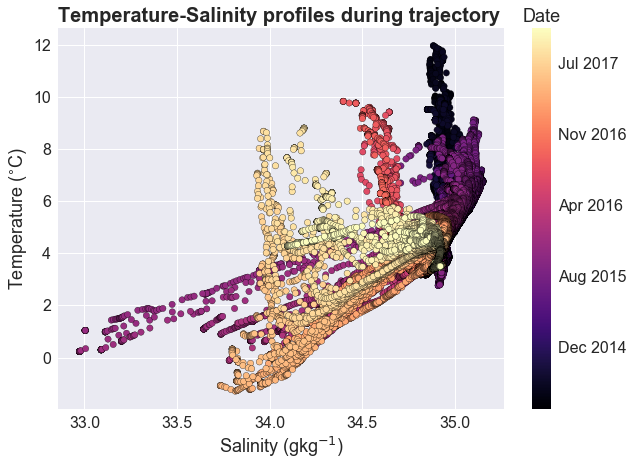

In [85]:
Image(filename='TSprof_time.png') 

# ARGO float trajectory

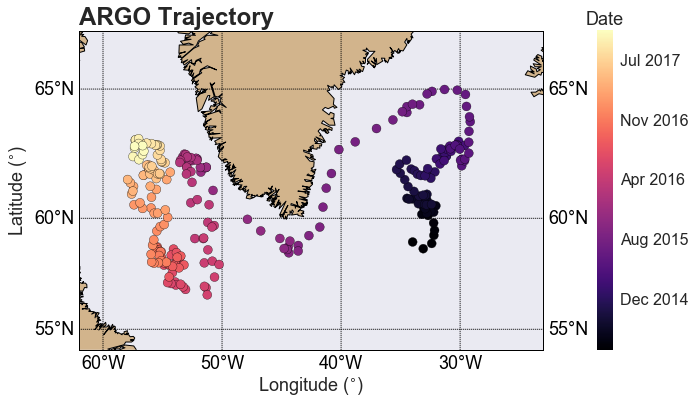

In [137]:
sns.set(font_scale=1.5)
fig = plt.figure(figsize=(10,7))
m = Basemap(projection='merc',llcrnrlat=54,urcrnrlat=67,llcrnrlon=-62,urcrnrlon=-23,resolution='l')
m.drawcoastlines()
m.fillcontinents(color='tan',lake_color='white')
plt.title('ARGO Trajectory',size=24,loc='left',fontweight='bold')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,5.),labels=[True,True,False,False],size=18)
m.drawmeridians(np.arange(-180.,181.,10.),labels=[False,False,False,True],size=18)
m.drawmapboundary(fill_color=(234/255,234/255,242/255))
x, y = m(data.longitude.data,data.latitude.data)
smap = m.scatter(x,y,80,c=data.time.data,marker='o',cmap='magma', edgecolor='k',zorder=10)
plt.xlabel('Longitude ($^{\circ}$)',size=18, labelpad=25)
plt.ylabel('Latitude ($^{\circ}$)', size=18, labelpad=50)
sbar = fig.colorbar(smap,fraction=0.03, pad=0.1)
originalLabel = [(float(i.get_text())*1e18) for i in sbar.ax.get_yticklabels()]
dateticks = [datetime.fromtimestamp(originalLabel[d]/1e9) for d in range(0,len(originalLabel))]
newLabel = []
for i in range(0,len(dateticks)):
    dateticksFormat = datetime.strptime((str(dateticks[i])), '%Y-%m-%d %H:%M:%S')
    newLabel.append(datetime.strftime(dateticksFormat, '%b 20%y'))
sbar.ax.set_yticklabels(newLabel, size=16)
sbar.ax.set_title('Date',size=18)
plt.tight_layout()
plt.savefig('trajectory.png', bbox_inches='tight')

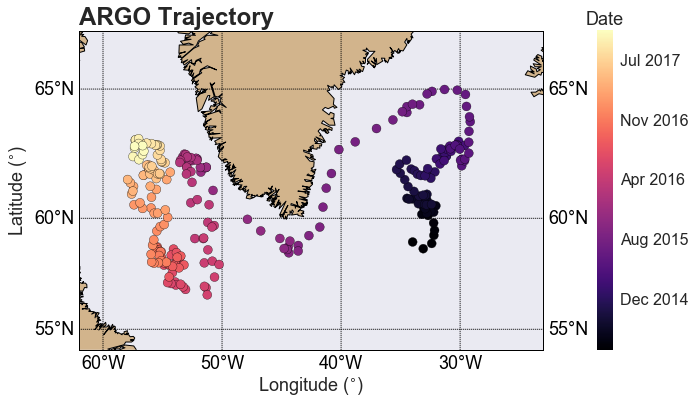

In [138]:
Image(filename='trajectory.png')

AttributeError: module 'matplotlib.pyplot' has no attribute 'get_xlabel'

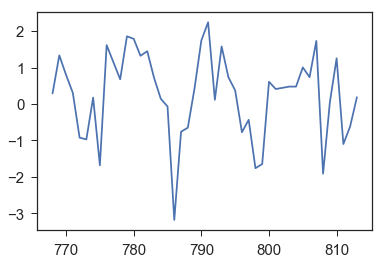

In [224]:
nao = pd.read_table('norm.nao.monthly.b5001.current.ascii.txt',' ',header=-1)
nao = nao.drop([0,2,3,4,5],axis=1)
nao['year'] = nao[1]
nao['index'] = nao[6].fillna(nao[7])
nao = nao.drop([1,6,7],axis=1)
nao = nao.dropna(axis=0,how='any')
start = nao[nao['year'] == 2014].index[0]
end = nao[nao['year']==2017].index[-1]
plt.plot(nao.loc[start:end]['index'])
